In [44]:
from scipy.interpolate import interp1d
import numpy as np
import random
import matplotlib.pyplot as plt

p_values=np.arange(0,1.1,.1)
q_values=np.arange(.1,1,.1)

In [45]:
#calculates the payoff of any state by computing flow plus the value of the future state given some p_j
def calculate_payoff(q_i, p_i, p_j_values, beta, future_state_values, eta):
    # Flow utility
    flow_utility_i = p_i * q_i

    # Calculate the weight using the specified expression
    weight = q_i * (1 - eta * p_i) / (q_i * (1 - eta * p_i) + (1 - q_i) * (1 - eta * p_j_values))

    # Create a linear interpolation function
    interp_function = interp1d(np.linspace(0, 1, len(future_state_values)), future_state_values, kind='linear', fill_value="extrapolate")

    # Perform linear interpolation
    future_state = interp_function(weight)

    # Print information for debugging
    #print("Flow Utility for Firm i:", flow_utility_i)
    #print("Weight:", weight)
    #print("Future State:", future_state)

    # Payoff function with the value of the future state
    payoff_i = flow_utility_i + beta * future_state

    return payoff_i

# Example parameters
q_i = 0.4
p_i = 0.6
p_j_values = np.array([0.2, 0.4, 0.6, 0.8])
beta = 0.9
future_state_values = np.array([.9,.8,.7,.6,.5,.4,.3,.2,.1])
eta = 0.1

# Calculate payoff using the modified function
payoff_i = calculate_payoff(q_i, p_i, .1, beta, future_state_values, eta)

# Print the results
print("\nPayoff for Firm i:", payoff_i)


Payoff for Firm i: 0.7709072164948453


In [46]:
#creates a matrix of payoffs, where the rows correspond to weights .1, ..., .9 and the columns prices 0, .., .9, 1
def generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_values,future_state_values):
    # Initialize the payoff matrix for firm i
    payoff_matrix_i = np.zeros((len(q_values), len(p_values)))

    # Calculate payoff for each combination of q_i and p_i
    for i, q_i in enumerate(q_values):
        for j, p_i in enumerate(p_values):
            # Calculate payoff for firm i
            payoff_matrix_i[i, j] = calculate_payoff(q_values[i],p_values[j],p_j,beta,future_state_values,eta)
    return payoff_matrix_i

# Example usage
q_values = np.arange(0.1, 1.0, 0.1)
p_values = np.arange(0.0, 1.1, 0.1)
p_j=.5
beta = 0.9
eta = 0.1
t = 0  # Replace with the desired time step
q_j = 1-q_values  # Replace with the actual q_j values
p_j_values = np.array([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])  # Replace with the actual p_j values
future_state_values=np.array([0,0,0,0,0,0,0,0,0])
# Calculate payoff matrix for firm i at time t
payoff_matrix_i_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_values,future_state_values)
payoff_matrix_j_t=generate_payoff_matrix(q_values,p_values,beta,eta,t,p_values,future_state_values)
# Print or use the generated payoff matrix
print("Payoff Matrix for Firm i at time t =", t)
print(payoff_matrix_i_t)
print("Payoff Matrix for Firm j at time t =", t)
print(payoff_matrix_j_t)


Payoff Matrix for Firm i at time t = 0
[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
 [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2 ]
 [0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]
 [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4 ]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
 [0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6 ]
 [0.   0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.56 0.63 0.7 ]
 [0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64 0.72 0.8 ]
 [0.   0.09 0.18 0.27 0.36 0.45 0.54 0.63 0.72 0.81 0.9 ]]
Payoff Matrix for Firm j at time t = 0
[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
 [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2 ]
 [0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]
 [0.   0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4 ]
 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
 [0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6 ]
 [0.   0.07 0.14 0.21 0.28 0.35 0.42 0.49 0.56 0.63

In [47]:
#Picks the optimal price by selecting the row where payoff is highest (column of max value in each row)
def find_optimal_prices(payoff_matrix, price_values):
    # Get the number of weights and prices
    num_weights, num_prices = payoff_matrix.shape

    # Initialize an array to store optimal prices for each weight
    optimal_prices = np.zeros(num_weights)

    # Find the index of the column (price) that maximizes the payoff for each weight
    optimal_price_indices = np.argmax(payoff_matrix, axis=1)

    # Map the index to the actual price value using the provided price values
    optimal_prices = price_values[optimal_price_indices]

    return optimal_prices

# Example usage:
# Replace the following with your actual payoff_matrix and price_values
example_payoff_matrix = np.random.rand(9, 11)
price_values = np.linspace(0, 1, 11)

optimal_prices_vector = find_optimal_prices(payoff_matrix_i_t, price_values)

# Print or use the optimal prices vector
print("Optimal Prices Vector:")
print(optimal_prices_vector)


In [62]:
#computes the value of the state by taking the value at the optimal price for each weight (max value in each row)
def store_state_values(payoff_matrix, price_values=np.arange(0,1.1,1)):
    # Get the number of weights and prices
    num_weights, num_prices = payoff_matrix.shape

    # Initialize an array to store the state values for each weight
    state_values = np.zeros(num_weights)

    # Find the index of the column (price) that maximizes the payoff for each weight
    optimal_price_indices = np.argmax(payoff_matrix, axis=1)

    # Map the index to the actual price value using the provided price values
    optimal_prices = price_values[optimal_price_indices]

    # Store the value of the payoff matrix at each weight and optimal price
    for i in range(num_weights):
        state_values[i] = payoff_matrix[i, optimal_price_indices[i]]

    return state_values


# Example usage:
# Replace the following with your actual payoff_matrix and price_values
example_payoff_matrix = np.random.rand(9, 11)
price_values = np.linspace(0, 1.1, 11)

state_values_t = store_state_values(example_payoff_matrix, price_values)

# Print or use the state values vector
print("State Values Vector at time t:")
print(state_values_t)


State Values Vector at time t:
[0.98155527 0.881624   0.86733393 0.97528666 0.95305592 0.94045606
 0.91646673 0.96437034 0.90049067]


In [64]:
#Starting with a guess for p_j, computes p_i from payoff matrix, uses this to recompute p_j
#iterates to convergence
def find_equilibrium_prices(q_values, p_values, beta, eta, t, future_state_values, initial_p_j_values, max_iterations=100, tolerance=1e-6):
    p_j_t = initial_p_j_values.copy()

    for iteration in range(max_iterations):
        # Calculate the payoff matrix for firm i using the current guess for p_j^t
        payoff_matrix_i_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_j_t, future_state_values)

        # Find the optimal prices for firm i
        p_i_t = find_optimal_prices(payoff_matrix_i_t, p_values)

        # Calculate the payoff matrix for firm j using the updated p_i^t as prices
        payoff_matrix_j_t = generate_payoff_matrix(q_values, p_values, beta, eta, t, p_i_t, future_state_values)

        # Find the optimal prices for firm j
        p_j_t_updated = find_optimal_prices(payoff_matrix_j_t, p_values)

        # Check for convergence
        if np.allclose(p_j_t, p_j_t_updated, atol=tolerance):
            #print("Converged after", iteration + 1, "iterations.")
            return p_i_t, p_j_t_updated, payoff_matrix_i_t, payoff_matrix_j_t

        # Update p_j vector for the next iteration
        p_j_t = p_j_t_updated

    #print("Did not converge within the maximum number of iterations.")
    return p_i_t, p_j_t_updated, payoff_matrix_i_t, payoff_matrix_j_t

# Example usage:
# Replace the following with your actual q_values, p_values, beta, eta, t, and initial_p_j_values
q_values = np.arange(0.1, 1.0, 0.1)
p_values = np.arange(0.0, 1.1, 0.1)
beta = 0.9
eta = 0.9
t = 1  # Replace with the desired time step
initial_p_j_values = np.random.rand(len(q_values))
future_state_values=np.array([0,0,0,0,0,0,0,0,0])
# Find equilibrium prices
equilibrium_prices_i, equilibrium_prices_j, equilibrium_payoff_matrix_i, equilibrium_payoff_matrix_j= find_equilibrium_prices(q_values, p_values, beta, eta, t, initial_p_j_values,future_state_values)

# Print or use the equilibrium prices for firm i and firm j
print("Equilibrium Prices for Firm i at time t =", t)
print(equilibrium_prices_i)

print("Equilibrium Prices for Firm j at time t =", t)
print(equilibrium_prices_j)

print("Equilibrium Payoff Matrix for Firm i at time t =", t)
print(equilibrium_payoff_matrix_i)

print("Equilibrium Payoff Matrix for Firm j at time t =", t)
print(equilibrium_payoff_matrix_j)



Equilibrium Prices for Firm i at time t = 1
[1.  1.  0.2 0.5 0.7 0.8 0.9 1.  0.9]
Equilibrium Prices for Firm j at time t = 1
[1.  1.  0.2 0.5 0.7 0.8 0.9 1.  0.9]
Equilibrium Payoff Matrix for Firm i at time t = 1
[[0.41925883 0.44487038 0.47096894 0.49757767 0.51780368 0.53597093
  0.55440992 0.57313443 0.59215922 0.61150005 0.63117382]
 [0.55834492 0.50220263 0.44152205 0.38019296 0.42926611 0.48024223
  0.53331447 0.58870306 0.63869814 0.67752675 0.7178289 ]
 [0.74562626 0.79464347 0.84528814 0.84001732 0.75586549 0.66050603
  0.55220314 0.56117436 0.64577312 0.73704232 0.8015899 ]
 [0.58234741 0.67718325 0.77571865 0.83965396 0.90653012 0.97692462
  0.97238915 0.82733597 0.65213838 0.75589135 0.88140087]
 [0.47343146 0.45616187 0.56403303 0.68004232 0.80603622 0.94446547
  1.0312047  1.12513203 1.05344634 0.7950093  0.93663465]
 [0.77938731 0.77252438 0.75551931 0.72587511 0.68020182 0.76061922
  0.92245549 1.10917484 1.2297216  1.2086322  0.96278743]
 [0.55080525 0.69496944 0.851

In [65]:
#initializes random p_j values
def initialize_p_j_values():
    return np.random.uniform(0, 1, 9)


In [66]:
#puts everything together: Starting at round T, computes optimal prices at each weight, stores the value (round T+1 values are 0)
#uses the stored value to compute the payoff in T-1, iterating for price until convergence, then storing price vector, state value vector
#does this to round 0, outputs a vector of prices for each firm for each round, and a vector of values, the first corresponds to weight .1, second to .2, etc.
def run_simulation_rounds(num_rounds, beta, eta):
    results = []

    # Set your initial future_state_values, beta, and eta
    q_values = np.arange(0.1, 1.0, 0.1)
    p_values = np.arange(0.0, 1.1, 0.1)

    # Loop from T-1 to round 1
    for t in range(num_rounds, 0, -1):
        # Update future_state_values
        future_state_values = np.zeros(9) if t == num_rounds else store_state_values(equilibrium_payoff_matrix_i, p_values)

        # Generate p_j_values based on some initial guess
        initial_p_j_values = initialize_p_j_values()

        # Call the find_equilibrium_prices function
        equilibrium_prices_i, equilibrium_prices_j, equilibrium_payoff_matrix_i, equilibrium_payoff_matrix_j = find_equilibrium_prices(
            q_values, p_values, beta, eta, t, future_state_values, initial_p_j_values, max_iterations=100, tolerance=1e-6
        )

        # Store state values for both firms
        state_values_i = store_state_values(equilibrium_payoff_matrix_i, p_values)
        state_values_j = store_state_values(equilibrium_payoff_matrix_j, p_values)

        # Append the results for this round
        results.append({
            "Round": t - 1,
            "Equilibrium Prices for Firm i": equilibrium_prices_i,
            "Equilibrium Prices for Firm j": equilibrium_prices_j,
            "State Values for Firm i": state_values_i,
            "State Values for Firm j": state_values_j
        })

    return results

# Example usage:
num_rounds = 3
beta = 0.9
eta = 0.9
run_simulation_rounds(num_rounds, beta, eta)

[{'Round': 2,
  'Equilibrium Prices for Firm i': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'Equilibrium Prices for Firm j': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'State Values for Firm i': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
  'State Values for Firm j': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
 {'Round': 1,
  'Equilibrium Prices for Firm i': array([0.3, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9]),
  'Equilibrium Prices for Firm j': array([0.3, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9]),
  'State Values for Firm i': array([0.21253521, 0.33451128, 0.46112903, 0.59292887, 0.73289157,
         0.88175258, 1.04134228, 1.22770992, 1.44477876]),
  'State Values for Firm j': array([0.21253521, 0.33451128, 0.46112903, 0.59292887, 0.73289157,
         0.88175258, 1.04134228, 1.22770992, 1.44477876])},
 {'Round': 0,
  'Equilibrium Prices for Firm i': array([0. , 0.1, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8, 0.9]),
  'Equilibrium Prices for Firm j': array([0. , 0.1, 0

In [69]:
def subset_simulation_results(num_rounds, beta, eta, q_i_initial):
    # Run the simulation to get full results
    full_results = run_simulation_rounds(num_rounds, beta, eta)

    # Initialize dictionaries to store subset results
    subset_results = {
        'Round': [],
        'q_i_t': [],
        'q_j_t': [],
        'p_i_t_0': [],
        'p_j_t_0': [],
        'state_value_i_t_0': [],
        'state_value_j_t_0': []
    }

    for result in full_results:
        # Extract the relevant information for q_i_initial
        q_i_t = q_i_initial
        q_j_t = 1 - q_i_t

        # Find the index corresponding to q_i_initial in q_values
        idx_q_i = int(q_i_t * 10)
        idx_q_j = int(q_j_t * 10)

        # Subset the equilibrium prices and state values for Firm i and Firm j for t=0
        equilibrium_prices_i_t_0 = result["Equilibrium Prices for Firm i"][idx_q_i-1]
        equilibrium_prices_j_t_0 = result["Equilibrium Prices for Firm j"][idx_q_j-1]
        state_values_i_t_0 = result["State Values for Firm i"][idx_q_i-1]
        state_values_j_t_0 = result["State Values for Firm j"][idx_q_j-1]

        # Append the values to the dictionaries
        subset_results['Round'].append(result['Round'])
        subset_results['q_i_t'].append(q_i_t)
        subset_results['q_j_t'].append(q_j_t)
        subset_results['p_i_t_0'].append(equilibrium_prices_i_t_0)
        subset_results['p_j_t_0'].append(equilibrium_prices_j_t_0)
        subset_results['state_value_i_t_0'].append(state_values_i_t_0)
        subset_results['state_value_j_t_0'].append(state_values_j_t_0)

    # Convert dictionaries to arrays
    result_arrays = {key: np.array(value) for key, value in subset_results.items()}

    return result_arrays

# Example usage:
num_rounds = 5
beta = 0.9
eta = 0.9
q_i_initial = 0.4

result_arrays = subset_simulation_results(num_rounds, beta, eta, q_i_initial)

# Access the arrays by key
rounds = result_arrays['Round']
q_i_values = result_arrays['q_i_t']
q_j_values = result_arrays['q_j_t']
p_i_values = result_arrays['p_i_t_0']
p_j_values = result_arrays['p_j_t_0']
state_value_i_values = result_arrays['state_value_i_t_0']
state_value_j_values = result_arrays['state_value_j_t_0']


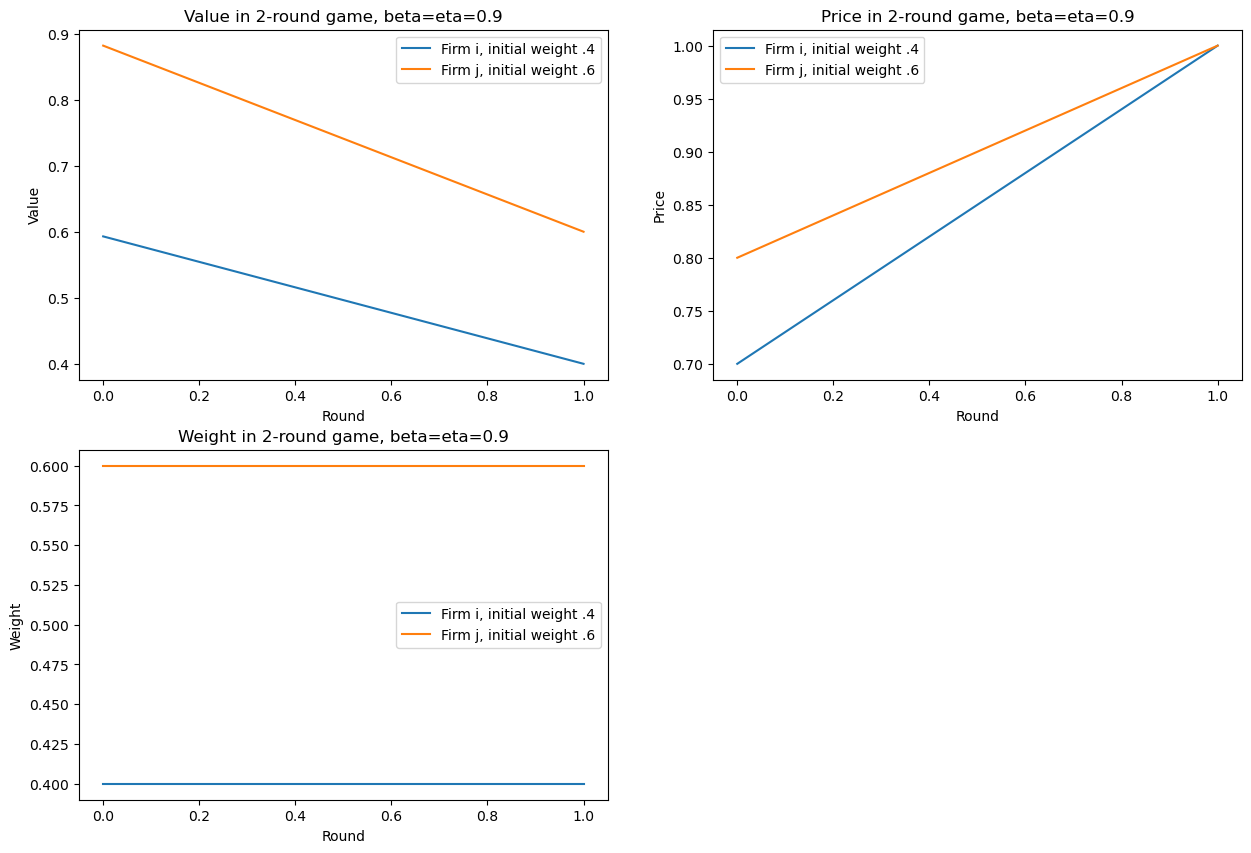

In [81]:
#graph of results for 15 rounds

num_rounds = 2
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(np.flip(subset_results['state_value_i_t_0']), label='Firm i, initial weight .4')
axs[0, 0].plot(np.flip(subset_results['state_value_j_t_0']), label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 2-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(np.flip(subset_results['p_i_t_0']), label='Firm i, initial weight .4')
axs[0, 1].plot(np.flip(subset_results['p_j_t_0']), label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 2-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(np.flip(subset_results['q_i_t']), label='Firm i, initial weight .4')
axs[1, 0].plot(np.flip(subset_results['q_j_t']), label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 2-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()

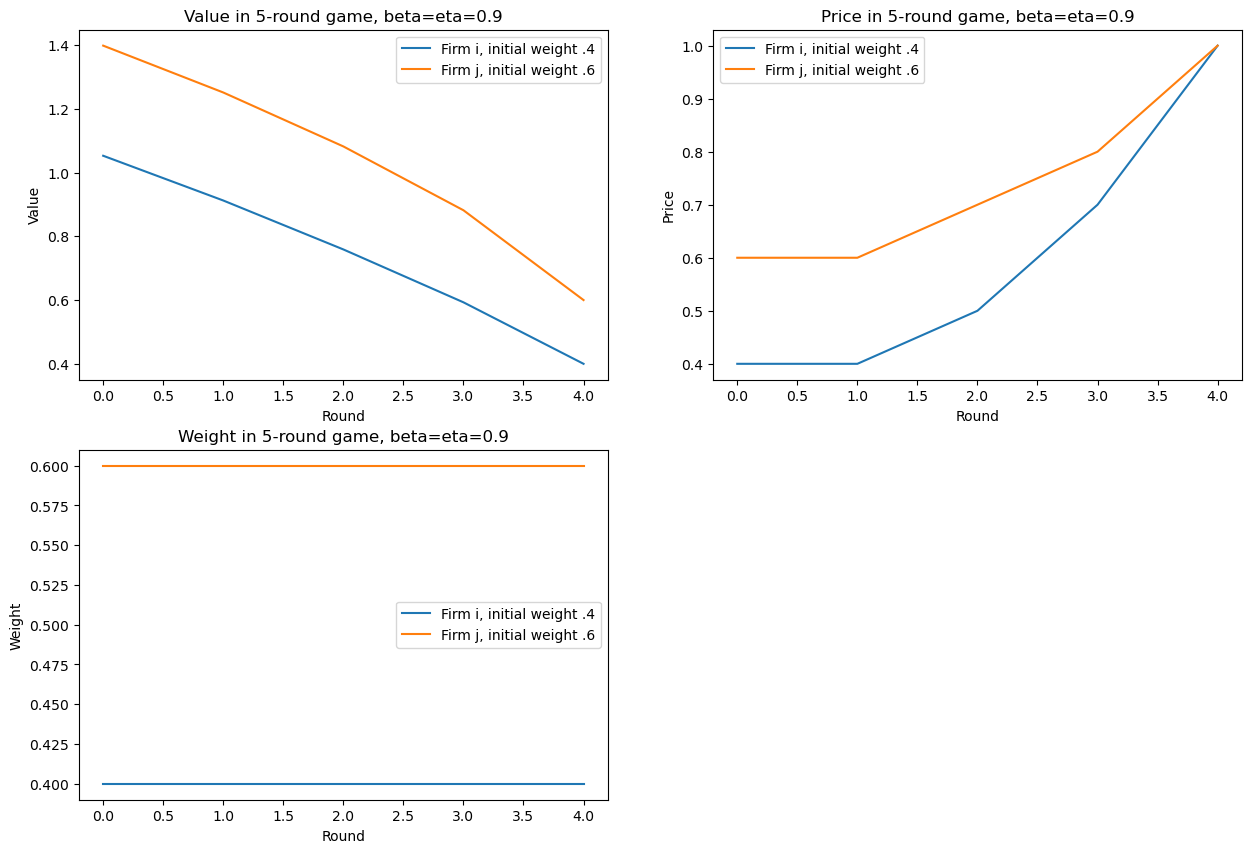

In [75]:
#graph of results for 5 rounds
#graph of results for 5 rounds
num_rounds = 5
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(np.flip(subset_results['state_value_i_t_0']), label='Firm i, initial weight .4')
axs[0, 0].plot(np.flip(subset_results['state_value_j_t_0']), label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 5-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(np.flip(subset_results['p_i_t_0']), label='Firm i, initial weight .4')
axs[0, 1].plot(np.flip(subset_results['p_j_t_0']), label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 5-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(np.flip(subset_results['q_i_t']), label='Firm i, initial weight .4')
axs[1, 0].plot(np.flip(subset_results['q_j_t']), label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 5-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()



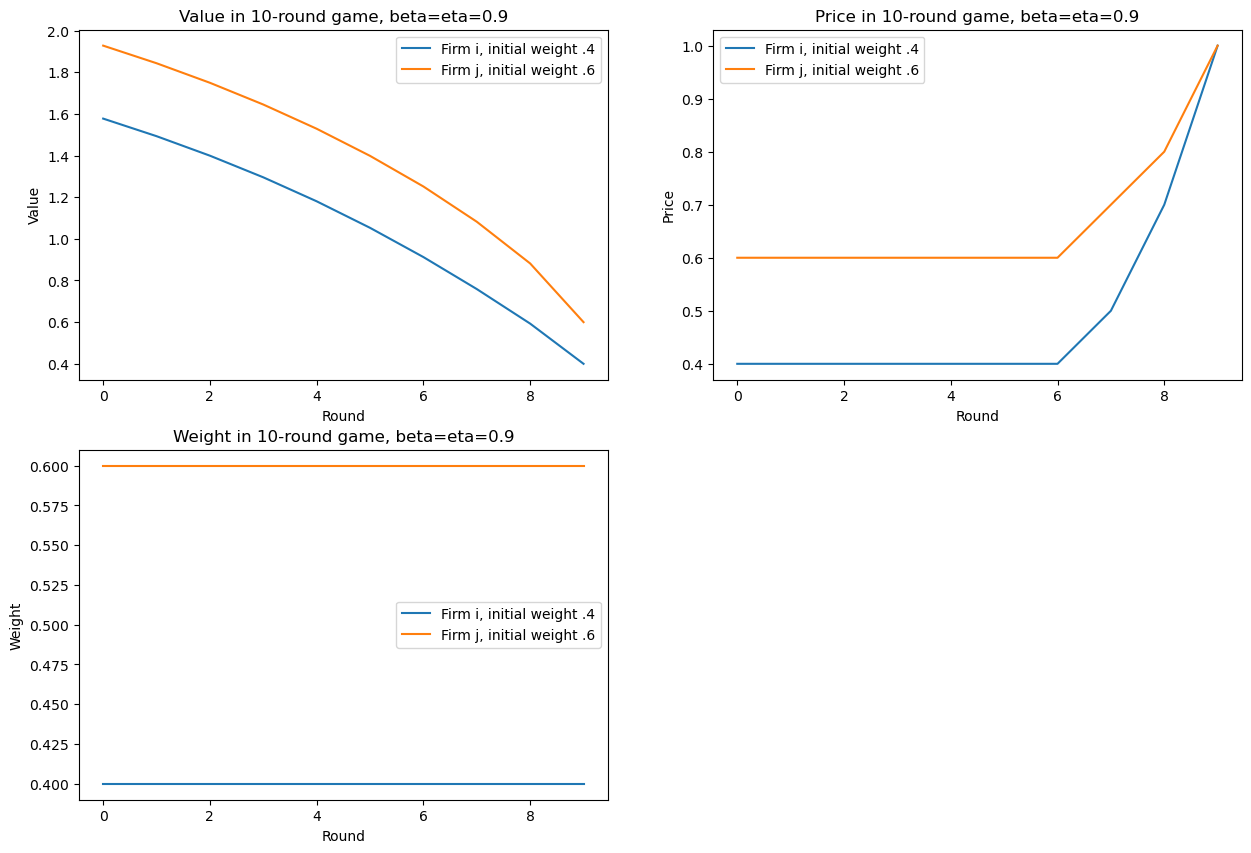

In [76]:
#graph of results for 5 rounds
#graph of results for 5 rounds
num_rounds = 10
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(np.flip(subset_results['state_value_i_t_0']), label='Firm i, initial weight .4')
axs[0, 0].plot(np.flip(subset_results['state_value_j_t_0']), label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 10-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(np.flip(subset_results['p_i_t_0']), label='Firm i, initial weight .4')
axs[0, 1].plot(np.flip(subset_results['p_j_t_0']), label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 10-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(np.flip(subset_results['q_i_t']), label='Firm i, initial weight .4')
axs[1, 0].plot(np.flip(subset_results['q_j_t']), label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 10-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()


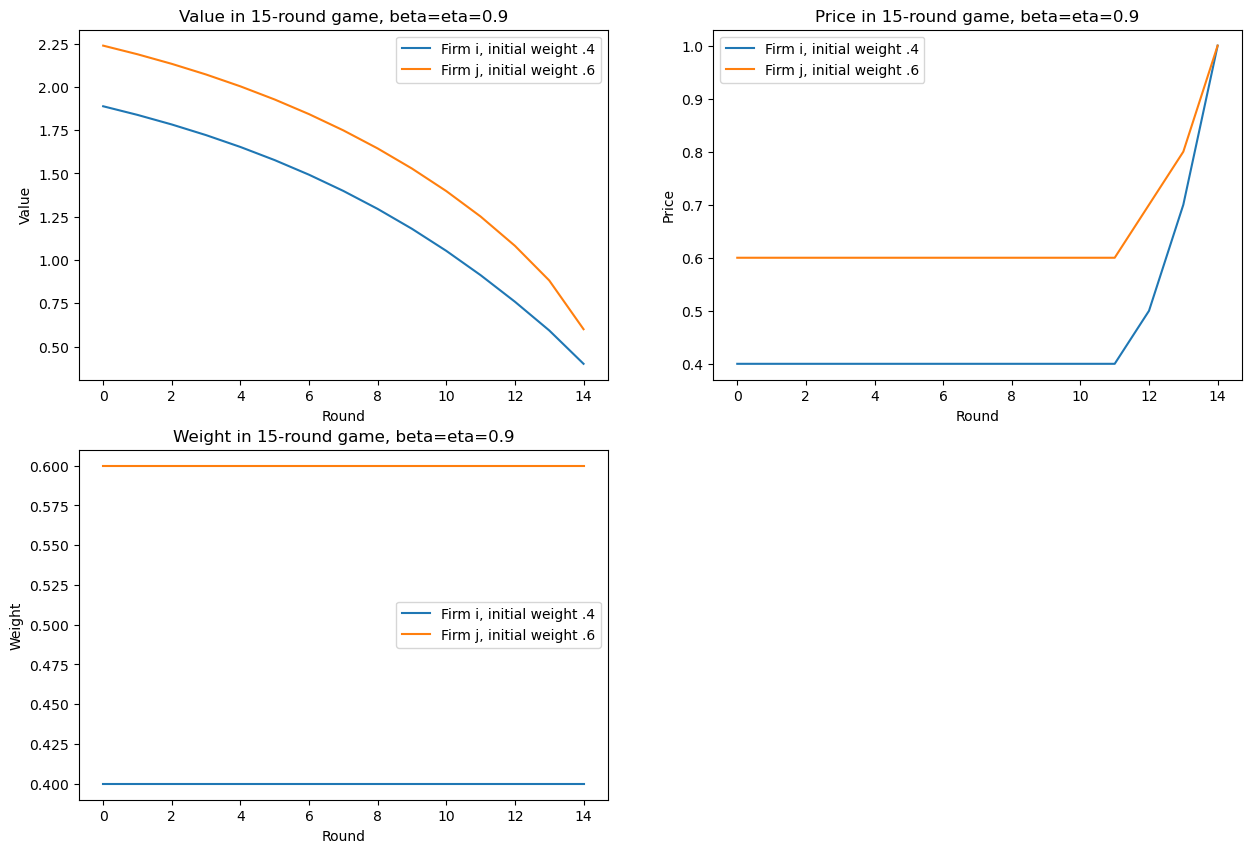

In [77]:
#graph of results for 15 rounds

num_rounds = 15
beta = 0.9
eta = 0.9
q_i_initial = 0.4

subset_results = subset_simulation_results(num_rounds, beta, eta, q_i_initial)
#set up plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the values
axs[0, 0].plot(np.flip(subset_results['state_value_i_t_0']), label='Firm i, initial weight .4')
axs[0, 0].plot(np.flip(subset_results['state_value_j_t_0']), label='Firm j, initial weight .6')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_title('Value in 15-round game, beta=eta=0.9')
axs[0, 0].legend()

# Plotting the prices
axs[0, 1].plot(np.flip(subset_results['p_i_t_0']), label='Firm i, initial weight .4')
axs[0, 1].plot(np.flip(subset_results['p_j_t_0']), label='Firm j, initial weight .6')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Price in 15-round game, beta=eta=0.9')
axs[0, 1].legend()

# Plotting the weights
axs[1, 0].plot(np.flip(subset_results['q_i_t']), label='Firm i, initial weight .4')
axs[1, 0].plot(np.flip(subset_results['q_j_t']), label='Firm j, initial weight .6')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Weight')
axs[1, 0].set_title('Weight in 15-round game, beta=eta=0.9')
axs[1, 0].legend()

# Hide the empty subplot
axs[1, 1].axis('off')

# Display the plot
plt.show()